In [1]:
!pip install tweepy

In [2]:
!pip install selenium

#  Importing the necessaries libraries for the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import re
import nltk
import string
import spacy
import requests
import warnings
warnings.filterwarnings("ignore")


from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup
from selenium import webdriver
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS



In [4]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saikr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saikr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saikr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Extracting reviews of the product from ecommerce website like amazon Performing the emotion mining.

#  Webscrapping Using Beautiful Soup

In [29]:

url=("https://www.amazon.in/boAt-Bluetooth-Speaker-Battery-Feature/product-reviews/B09TRW4619/ref=cm_cr_othr_d_show_all_btm?ie=UTF8&reviewerType=all_reviews")
code=requests.get(url)
code

<Response [200]>

In [30]:
soup=BeautifulSoup(code.content,"html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
  <link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
  <link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
  <link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:csm:head-open-pa

In [31]:
star_rating = soup.select('i.review-rating span.a-icon-alt')[2:]
star_rating

[<span class="a-icon-alt">3.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">3.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>]

In [32]:
len(star_rating)

10

In [33]:
reviews=soup.select("span.review-text-content span")
reviews

[<span class="a-spinner a-spinner-medium cr-media-spinner"></span>,
 <span class="a-color-inverse cr-media-error-msg">
                     The media could not be loaded.
                 </span>,
 <span> Just bought it a few minutes ago.<br/><br/>I previously bought JBL Charge 5, which was a Rs. 16K trash speaker. But when I compare that JBL with this speaker, this one is well over my expectation. This speaker sounds really really good.<br/><br/>Of course the bigger the speaker, the better it will sound. In this case, the speaker is about 12cm (height) x 29cm (wide) x 12cm(depth). And the speaker has to be bigger to give you more bass.<br/><br/>According to Hofmann's iron law, you can choose only two:<br/>[1] Size (compactness)<br/>[2] Bass<br/>[3] Loudness<br/><br/>This is bigger, so it can give you bass and loudness compared to smaller speakers.<br/><br/>Anyway, here's what I think:<br/><br/>Pros:<br/>1. Bass and Clarity: The speaker has amazing bass and extremely good clarity.<br/>

In [34]:
len(reviews)

14

In [35]:
ratings=[]
rev_content=[]
for i in range(len(star_rating)):
    ratings.append(star_rating[i].get_text())
    rev_content.append(reviews[i].get_text().strip("\n"))

In [36]:
rev_content

['',
 '                    The media could not be loaded.\n                ',
 '\xa0Just bought it a few minutes ago.I previously bought JBL Charge 5, which was a Rs. 16K trash speaker. But when I compare that JBL with this speaker, this one is well over my expectation. This speaker sounds really really good.Of course the bigger the speaker, the better it will sound. In this case, the speaker is about 12cm (height) x 29cm (wide) x 12cm(depth). And the speaker has to be bigger to give you more bass.According to Hofmann\'s iron law, you can choose only two:[1] Size (compactness)[2] Bass[3] LoudnessThis is bigger, so it can give you bass and loudness compared to smaller speakers.Anyway, here\'s what I think:Pros:1. Bass and Clarity: The speaker has amazing bass and extremely good clarity.2. Sound Quality: The sound quality and volume are extremely good. 14W woofer with tweeters isn\'t exactly a bad thing!3. Quality Strap Provided: Good quality strap provided which will let you even wear t

In [37]:
review_df=pd.DataFrame()
review_df["Ratings"]=ratings
review_df["Reviews"]=rev_content
review_df.describe

<bound method NDFrame.describe of               Ratings                                            Reviews
0  3.0 out of 5 stars                                                   
1  4.0 out of 5 stars                      The media could not be loa...
2  4.0 out of 5 stars   Just bought it a few minutes ago.I previously...
3  4.0 out of 5 stars  It is loud for a 14W speaker, bass is good, bu...
4  4.0 out of 5 stars                 Velue for money 💰JBL ka chota Bhai
5  4.0 out of 5 stars                  As expected,good device,go for it
6  4.0 out of 5 stars  Superr quality for 14w it is a beast💥But for b...
7  4.0 out of 5 stars         Music, movies sound experience is amazing.
8  3.0 out of 5 stars                  I like it i am happy good product
9  4.0 out of 5 stars  As mentioned by company Backup is 7 Hrs, but i...>

#  Text Mining

In [38]:
# Again importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS



In [39]:
review_df=[Reviews.strip() for Reviews in review_df.Reviews]
review_df=[Reviews for Reviews in review_df if Reviews]
review_df

['The media could not be loaded.',
 'Just bought it a few minutes ago.I previously bought JBL Charge 5, which was a Rs. 16K trash speaker. But when I compare that JBL with this speaker, this one is well over my expectation. This speaker sounds really really good.Of course the bigger the speaker, the better it will sound. In this case, the speaker is about 12cm (height) x 29cm (wide) x 12cm(depth). And the speaker has to be bigger to give you more bass.According to Hofmann\'s iron law, you can choose only two:[1] Size (compactness)[2] Bass[3] LoudnessThis is bigger, so it can give you bass and loudness compared to smaller speakers.Anyway, here\'s what I think:Pros:1. Bass and Clarity: The speaker has amazing bass and extremely good clarity.2. Sound Quality: The sound quality and volume are extremely good. 14W woofer with tweeters isn\'t exactly a bad thing!3. Quality Strap Provided: Good quality strap provided which will let you even wear the speaker on your shoulder!4. USB Provided: Ha

In [40]:
# Joining the list into  one string/text

reviews_text=" ".join(review_df)
reviews_text

'The media could not be loaded. Just bought it a few minutes ago.I previously bought JBL Charge 5, which was a Rs. 16K trash speaker. But when I compare that JBL with this speaker, this one is well over my expectation. This speaker sounds really really good.Of course the bigger the speaker, the better it will sound. In this case, the speaker is about 12cm (height) x 29cm (wide) x 12cm(depth). And the speaker has to be bigger to give you more bass.According to Hofmann\'s iron law, you can choose only two:[1] Size (compactness)[2] Bass[3] LoudnessThis is bigger, so it can give you bass and loudness compared to smaller speakers.Anyway, here\'s what I think:Pros:1. Bass and Clarity: The speaker has amazing bass and extremely good clarity.2. Sound Quality: The sound quality and volume are extremely good. 14W woofer with tweeters isn\'t exactly a bad thing!3. Quality Strap Provided: Good quality strap provided which will let you even wear the speaker on your shoulder!4. USB Provided: Has USB

In [41]:
# Remove Punctuations

no_punc_text=reviews_text.translate(str.maketrans(" "," ",string.punctuation))
no_punc_text

'The media could not be loaded Just bought it a few minutes agoI previously bought JBL Charge 5 which was a Rs 16K trash speaker But when I compare that JBL with this speaker this one is well over my expectation This speaker sounds really really goodOf course the bigger the speaker the better it will sound In this case the speaker is about 12cm height x 29cm wide x 12cmdepth And the speaker has to be bigger to give you more bassAccording to Hofmanns iron law you can choose only two1 Size compactness2 Bass3 LoudnessThis is bigger so it can give you bass and loudness compared to smaller speakersAnyway heres what I thinkPros1 Bass and Clarity The speaker has amazing bass and extremely good clarity2 Sound Quality The sound quality and volume are extremely good 14W woofer with tweeters isnt exactly a bad thing3 Quality Strap Provided Good quality strap provided which will let you even wear the speaker on your shoulder4 USB Provided Has USB mode which will let you plug your thumb drive with 

#  Tokenization

In [42]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saikr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saikr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['The', 'media', 'could', 'not', 'be', 'loaded', 'Just', 'bought', 'it', 'a', 'few', 'minutes', 'agoI', 'previously', 'bought', 'JBL', 'Charge', '5', 'which', 'was', 'a', 'Rs', '16K', 'trash', 'speaker', 'But', 'when', 'I', 'compare', 'that', 'JBL', 'with', 'this', 'speaker', 'this', 'one', 'is', 'well', 'over', 'my', 'expectation', 'This', 'speaker', 'sounds', 'really', 'really', 'goodOf', 'course', 'the', 'bigger']


In [44]:
# Removing the Stop words

from nltk.corpus import stopwords
my_stop_words=stopwords.words("english")


sw_list=["I","The","It","A"]
my_stop_words.extend(sw_list)


no_stop_words=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_words)

['media', 'could', 'loaded', 'Just', 'bought', 'minutes', 'agoI', 'previously', 'bought', 'JBL', 'Charge', '5', 'Rs', '16K', 'trash', 'speaker', 'But', 'compare', 'JBL', 'speaker', 'one', 'well', 'expectation', 'This', 'speaker', 'sounds', 'really', 'really', 'goodOf', 'course', 'bigger', 'speaker', 'better', 'sound', 'In', 'case', 'speaker', '12cm', 'height', 'x', '29cm', 'wide', 'x', '12cmdepth', 'And', 'speaker', 'bigger', 'give', 'bassAccording', 'Hofmanns', 'iron', 'law', 'choose', 'two1', 'Size', 'compactness2', 'Bass3', 'LoudnessThis', 'bigger', 'give', 'bass', 'loudness', 'compared', 'smaller', 'speakersAnyway', 'heres', 'thinkPros1', 'Bass', 'Clarity', 'speaker', 'amazing', 'bass', 'extremely', 'good', 'clarity2', 'Sound', 'Quality', 'sound', 'quality', 'volume', 'extremely', 'good', '14W', 'woofer', 'tweeters', 'isnt', 'exactly', 'bad', 'thing3', 'Quality', 'Strap', 'Provided', 'Good', 'quality', 'strap', 'provided', 'let', 'even', 'wear', 'speaker', 'shoulder4', 'USB', 'Prov

In [45]:
!pip install nltk

In [46]:
# Normalizing the Data

import nltk

nltk.download('stopwords')

my_stop_words=stopwords.words('english')

sw_list=["I","The","It","A"]
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['media', 'could', 'loaded', 'Just', 'bought', 'minutes', 'agoI', 'previously', 'bought', 'JBL', 'Charge', '5', 'Rs', '16K', 'trash', 'speaker', 'But', 'compare', 'JBL', 'speaker', 'one', 'well', 'expectation', 'This', 'speaker', 'sounds', 'really', 'really', 'goodOf', 'course', 'bigger', 'speaker', 'better', 'sound', 'In', 'case', 'speaker', '12cm', 'height', 'x', '29cm', 'wide', 'x', '12cmdepth', 'And', 'speaker', 'bigger', 'give', 'bassAccording', 'Hofmanns', 'iron', 'law', 'choose', 'two1', 'Size', 'compactness2', 'Bass3', 'LoudnessThis', 'bigger', 'give', 'bass', 'loudness', 'compared', 'smaller', 'speakersAnyway', 'heres', 'thinkPros1', 'Bass', 'Clarity', 'speaker', 'amazing', 'bass', 'extremely', 'good', 'clarity2', 'Sound', 'Quality', 'sound', 'quality', 'volume', 'extremely', 'good', '14W', 'woofer', 'tweeters', 'isnt', 'exactly', 'bad', 'thing3', 'Quality', 'Strap', 'Provided', 'Good', 'quality', 'strap', 'provided', 'let', 'even', 'wear', 'speaker', 'shoulder4', 'USB', 'Prov

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saikr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
# Stemming 

from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['media', 'could', 'load', 'just', 'bought', 'minut', 'agoi', 'previous', 'bought', 'jbl', 'charg', '5', 'rs', '16k', 'trash', 'speaker', 'but', 'compar', 'jbl', 'speaker', 'one', 'well', 'expect', 'thi', 'speaker', 'sound', 'realli', 'realli', 'goodof', 'cours', 'bigger', 'speaker', 'better', 'sound', 'in', 'case', 'speaker', '12cm', 'height', 'x', '29cm', 'wide', 'x', '12cmdepth', 'and', 'speaker', 'bigger', 'give', 'bassaccord', 'hofmann', 'iron', 'law', 'choos', 'two1', 'size', 'compactness2', 'bass3', 'loudnessthi', 'bigger', 'give', 'bass', 'loud', 'compar', 'smaller', 'speakersanyway', 'here', 'thinkpros1', 'bass', 'clariti', 'speaker', 'amaz', 'bass', 'extrem', 'good', 'clarity2', 'sound', 'qualiti', 'sound', 'qualiti', 'volum', 'extrem', 'good', '14w', 'woofer', 'tweeter', 'isnt', 'exactli', 'bad', 'thing3', 'qualiti', 'strap', 'provid', 'good', 'qualiti', 'strap', 'provid', 'let', 'even', 'wear', 'speaker', 'shoulder4', 'usb', 'provid', 'ha', 'usb', 'mode', 'let', 'plug', 'th

In [24]:
!python -m spacy download en


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 393.8 kB/s eta 0:00:33
     --------------------------------------- 0.1/12.8 MB 726.2 kB/s eta 0:00:18
     --------------------------------------- 0.1/12.8 MB 774.0 kB/s eta 0:00:17
      --------------------------------------- 0.3/12.8 MB 1.0 MB/s eta 0:00:12
      --------------------------------------- 0.3/12.8 MB 1.0 MB/s eta 0:00:13
     - -------------------------------------- 0.5/12.8 MB 1.5 MB/s eta 0:00:09
     - -------------------------------------- 0.6/12.8 MB 1.4 MB/s eta 0:00:09
     -- ------------------------------------- 0.8/12.8 MB 1.7 MB/s eta 0:00:07
     -- ------------------------------------- 0.9/12.8 MB 2.0 MB/s eta 0:00:06
     --- ------------------------------------ 1.1/12.8 MB 2.1 MB/s eta 0:00:06
     --- ------------------------------------ 1.2/12.8 MB 2.0 M

In [48]:
# Lemmatization

nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

media could loaded just bought minutes agoi previously bought jbl charge 5 rs 16k trash speaker but compare jbl speaker one well expectation this speaker sounds really really goodof course bigger speaker better sound in case speaker 12cm height x 29cm wide x 12cmdepth and speaker bigger give bassaccording hofmanns iron law choose two1 size compactness2 bass3 loudnessthis bigger give bass loudness compared smaller speakersanyway heres thinkpros1 bass clarity speaker amazing bass extremely good clarity2 sound quality sound quality volume extremely good 14w woofer tweeters isnt exactly bad thing3 quality strap provided good quality strap provided let even wear speaker shoulder4 usb provided has usb mode let plug thumb drive songs play triedthe cons1 sleeve tight sleeve top bit loose glides hold that2 no memory speaker doesnt save settings for example dont like flashy rgb colours turn every time turn speaker need press m key second turn light off3 limited light colours wanted constant colo

In [49]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['medium', 'could', 'load', 'just', 'buy', 'minute', 'agoi', 'previously', 'buy', 'jbl', 'charge', '5', 'rs', '16k', 'trash', 'speaker', 'but', 'compare', 'jbl', 'speaker', 'one', 'well', 'expectation', 'this', 'speaker', 'sound', 'really', 'really', 'goodof', 'course', 'big', 'speaker', 'well', 'sound', 'in', 'case', 'speaker', '12', 'cm', 'height', 'x', '29', 'cm', 'wide', 'x', '12cmdepth', 'and', 'speaker', 'big', 'give', 'bassaccorde', 'hofmann', 'iron', 'law', 'choose', 'two1', 'size', 'compactness2', 'bass3', 'loudnessthis', 'big', 'give', 'bass', 'loudness', 'compare', 'small', 'speakersanyway', 'here', 'thinkpros1', 'bass', 'clarity', 'speaker', 'amazing', 'bass', 'extremely', 'good', 'clarity2', 'sound', 'quality', 'sound', 'quality', 'volume', 'extremely', 'good', '14w', 'woofer', 'tweeter', 'be', 'not', 'exactly', 'bad', 'thing3', 'quality', 'strap', 'provide', 'good', 'quality', 'strap', 'provide', 'let', 'even', 'wear', 'speaker', 'shoulder4', 'usb', 'provide', 'have', 'us

In [50]:
clean_reviews=" ".join(lemmas)
clean_reviews

'medium could load just buy minute agoi previously buy jbl charge 5 rs 16k trash speaker but compare jbl speaker one well expectation this speaker sound really really goodof course big speaker well sound in case speaker 12 cm height x 29 cm wide x 12cmdepth and speaker big give bassaccorde hofmann iron law choose two1 size compactness2 bass3 loudnessthis big give bass loudness compare small speakersanyway here thinkpros1 bass clarity speaker amazing bass extremely good clarity2 sound quality sound quality volume extremely good 14w woofer tweeter be not exactly bad thing3 quality strap provide good quality strap provide let even wear speaker shoulder4 usb provide have usb mode let plug thumb drive song play triedthe cons1 sleeve tight sleeve top bit loose glide hold that2 no memory speaker do not save setting for example do not like flashy rgb colour turn every time turn speaker need press m key second turn light off3 limited light colour want constant colour like purple white example f

#  Feature Extraction

# 1.) Count Vectorizer


In [51]:
# Importing required libraries

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [52]:
print(cv.vocabulary_)

{'medium': 140, 'could': 69, 'load': 131, 'just': 119, 'buy': 43, 'minute': 143, 'agoi': 19, 'previously': 167, 'jbl': 117, 'charge': 50, 'rs': 182, '16k': 7, 'trash': 214, 'speaker': 197, 'but': 41, 'compare': 62, 'one': 156, 'well': 228, 'expectation': 84, 'this': 207, 'sound': 196, 'really': 176, 'goodof': 99, 'course': 71, 'big': 36, 'in': 113, 'case': 48, '12': 4, 'cm': 56, 'height': 103, '29': 8, 'wide': 230, '12cmdepth': 5, 'and': 22, 'give': 96, 'bassaccorde': 30, 'hofmann': 107, 'iron': 114, 'law': 123, 'choose': 52, 'two1': 218, 'size': 190, 'compactness2': 60, 'bass3': 29, 'loudnessthis': 138, 'bass': 28, 'loudness': 137, 'small': 192, 'speakersanyway': 198, 'here': 104, 'thinkpros1': 206, 'clarity': 54, 'amazing': 21, 'extremely': 87, 'good': 98, 'clarity2': 55, 'quality': 173, 'volume': 223, '14w': 6, 'woofer': 233, 'tweeter': 217, 'be': 33, 'not': 151, 'exactly': 82, 'bad': 27, 'thing3': 204, 'strap': 200, 'provide': 170, 'let': 125, 'even': 80, 'wear': 227, 'shoulder4': 

In [53]:
print(cv.get_feature_names_out()[50:100])

['charge' 'cheap' 'choose' 'chota' 'clarity' 'clarity2' 'cm' 'colour'
 'come' 'comfort' 'compactness2' 'company' 'compare' 'con' 'connect'
 'connection' 'connectivity' 'cons1' 'constant' 'could' 'count' 'course'
 'deal' 'device' 'devicego' 'disagree' 'disconnect' 'do' 'drive' 'easy'
 'even' 'every' 'exactly' 'example' 'expectation' 'expectedgood'
 'experience' 'extremely' 'fast' 'feel' 'female' 'flashy' 'fm' 'for'
 'fragile' 'get' 'give' 'glide' 'good' 'goodof']


In [54]:
print(reviewscv.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [55]:
print(reviewscv.toarray().shape)

(441, 235)


#  2.Count Vectorizer with N-grams(Trigrams and Bigrams)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
cv_ngram_range=CountVectorizer(analyzer="word",ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)


In [57]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['14w' '29' '34' '3hrs' '50' '5star' 'amazing' 'as' 'backup' 'bass'
 'battery' 'be' 'big' 'bit' 'bluetooth' 'build' 'but' 'buy' 'can' 'charge'
 'cheap' 'cm' 'colour' 'come' 'compare' 'con' 'connect' 'connection'
 'deal' 'disconnect' 'do' 'drive' 'even' 'example' 'extremely' 'flashy'
 'give' 'good' 'hrs' 'huge' 'jbl' 'let' 'life' 'light' 'like' 'look'
 'loose' 'lot' 'mention' 'mode' 'music' 'need' 'nice' 'no' 'not' 'number'
 'off3' 'okayish' 'one' 'people' 'people5' 'phone' 'plastic8' 'play'
 'playback' 'plug' 'power' 'press' 'previously' 'pro' 'product' 'provide'
 'pull' 'purple' 'quality' 'random' 'range' 'really' 'rgb' 'say' 'second'
 'size' 'sleeve' 'song' 'sound' 'speaker' 'strap' 'thumb' 'time' 'turn'
 'usb' 'use' 'volume' 'we' 'wear' 'well' 'wide' 'will' 'without' 'work']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#  TF-IDF Vectorizer

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [59]:
print(tfidfv_ngram_max_features.get_feature_names_out())
print(tfidf_matrix_ngram.toarray())

['100' '1010durability' '1010ease' '1010performance' '12' '12cmdepth'
 '14w' '16k' '29' '34' '3hrs' '4hrsand' '50' '5star' '610'
 '810connectivity' '8con' '9hrs' 'actually' 'agoi' 'always' 'amazing'
 'and' 'another' 'as' 'awesome' 'backup' 'bad' 'bass' 'bass3'
 'bassaccorde' 'battery' 'batterythey' 'be' 'beast' 'bhai' 'big' 'bit'
 'black' 'bluetooth' 'build' 'but' 'button' 'buy' 'can' 'card6'
 'cardboard' 'carry' 'case' 'certainly' 'charge' 'cheap' 'choose' 'chota'
 'clarity' 'clarity2' 'cm' 'colour' 'come' 'comfort' 'compactness2'
 'company' 'compare' 'con' 'connect' 'connection' 'connectivity' 'cons1'
 'constant' 'could' 'count' 'course' 'deal' 'device' 'devicego' 'disagree'
 'disconnect' 'do' 'drive' 'easy' 'even' 'every' 'exactly' 'example'
 'expectation' 'expectedgood' 'experience' 'extremely' 'fast' 'feel'
 'female' 'flashy' 'fm' 'for' 'fragile' 'get' 'give' 'glide' 'good'
 'goodof' 'greatit' 'happy' 'have' 'height' 'here' 'hereoverall' 'high'
 'hofmann' 'hold' 'holder' 'hour' 'h

#  Word Cloud Generator

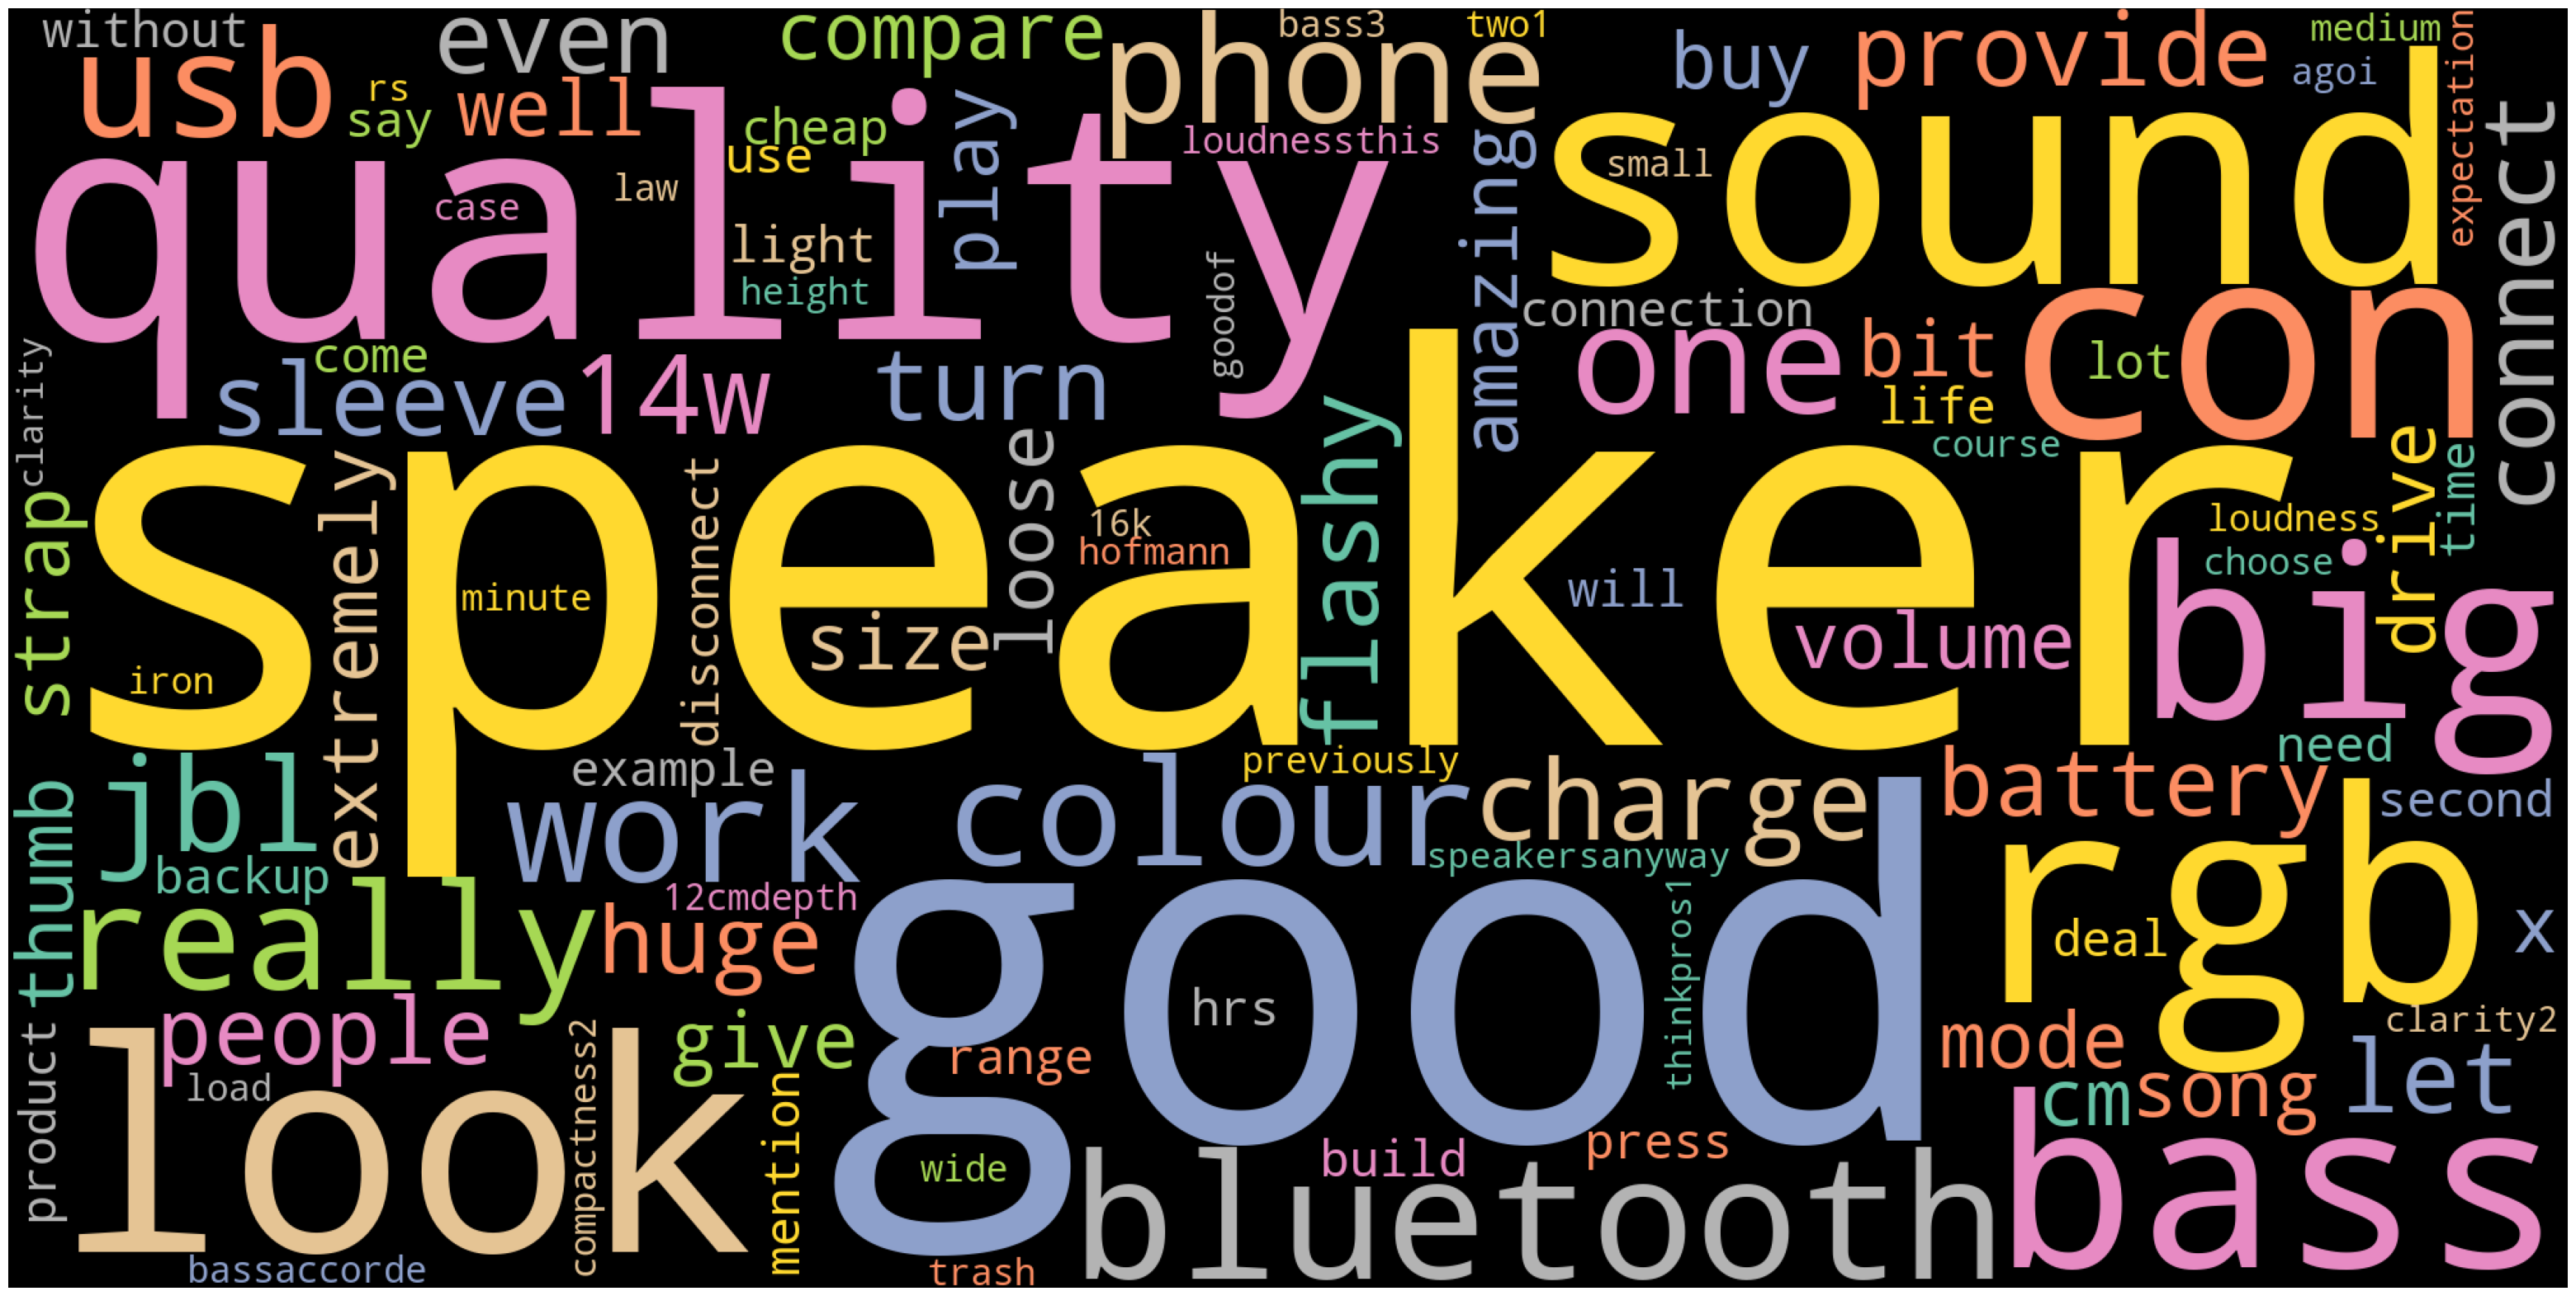

In [60]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add("Pron")
wordcloud=WordCloud(width=2000,height=1000,background_color="black",max_words=100,
                   colormap="Set2",stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

#  Name Entity Recognition

In [61]:
# Parts of Speech Tagging(POS)

nlp=spacy.load("en_core_web_sm")

one_block=clean_reviews
doc_block=nlp(one_block)
html = spacy.displacy.render(doc, style="ent", jupyter=True)


In [62]:
for token in doc_block[100:200]:
    print(token,token.pos_)

even ADV
wear VERB
speaker NOUN
shoulder4 PROPN
usb PROPN
provide VERB
have VERB
usb NOUN
mode NOUN
let VERB
plug VERB
thumb NOUN
drive NOUN
song NOUN
play VERB
triedthe PROPN
cons1 PROPN
sleeve VERB
tight ADJ
sleeve NOUN
top ADJ
bit NOUN
loose ADJ
glide NOUN
hold VERB
that2 ADV
no DET
memory NOUN
speaker NOUN
do AUX
not PART
save VERB
setting VERB
for ADP
example NOUN
do AUX
not PART
like VERB
flashy ADJ
rgb PROPN
colour NOUN
turn VERB
every DET
time NOUN
turn NOUN
speaker NOUN
need PROPN
press PROPN
m VERB
key ADJ
second ADJ
turn NOUN
light ADJ
off3 PROPN
limited ADJ
light ADJ
colour NOUN
want VERB
constant ADJ
colour NOUN
like ADP
purple ADJ
white ADJ
example NOUN
flashy ADJ
rgb4 PROPN
too ADV
flashy ADJ
rgb PROPN
lead NOUN
do AUX
not PART
always ADV
look VERB
good ADJ
many ADJ
people5 ADJ
usb NOUN
mode NOUN
do AUX
not PART
connect VERB
phone NOUN
usb PROPN
female ADJ
jack NOUN
will AUX
not PART
connect VERB
phone NOUN
charge NOUN
phone NOUN
charge NOUN
but CCONJ
can AUX
not PART
ev

In [63]:
#Filtering the nouns and verbs

nouns_verbs=[token.text for token in doc_block if token.pos_ in("NOUN","VERB")]
print(nouns_verbs[100:200])

['play', 'song', 'phone', 'require', 'thumb', 'drive', 'work', 'battery', 'life', 'look', 'battery', 'lot', 'juice', 'work', 'sound', 'feel', 'look', 'product', 'look', 'say', 'sleeve', 'bit', 'lot', 'people', 'say', 'ribbon', 'holder', 'come', 'disagree', 'pull', 'quality', 'plastic8', 'range', 'speaker', 'range', 'though9', 'connection', 'device', 'connect', 'speaker', 'one', 'get', 'speaker', 'let', 'disconnect', 'speaker', 'press', 'power', 'button', 'work', 'look', 'count', 'con', 'list', 'deal', 'people', 'sound', 'quality', 'speaker', 'look', 'connection', 'battery', 'life', 'soso', 'think', 'sideeditadde', 'con', 'number', 'deal', 'people', 'reduce', 'star', '14w', 'speaker', 'bass', 'build', 'quality', 'packing', 'greatit', 'come', 'cardboard', 'use', 'hrs', 'volumeyou', 'need', 'volume', 'time', 'size', 'fm', 'work', 'connectivity', 'colour', 'look', 'velue', 'money', 'quality', '14w', 'beast', 'bass', '1010performance']


In [64]:
# Counting the noun and verb tokens

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [65]:
x=cv.fit_transform(nouns_verbs)
sum_words=x.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=["word","count"]
wd_df[0:10]

,word,count
0,speaker,15
1,quality,9
2,look,7
3,sound,5
4,bass,5
5,colour,4
6,phone,4
7,work,4
8,charge,3
9,14w,3


<Axes: title={'center': 'Top ten nouns and verbs'}, xlabel='word'>

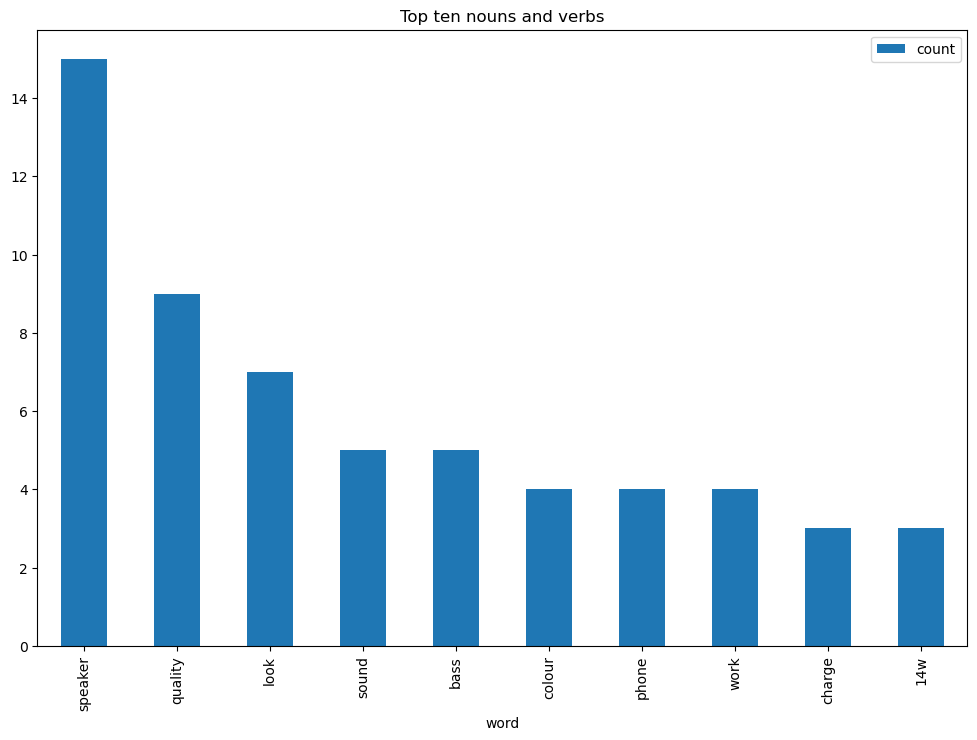

In [66]:
# Visualizing results (Barchart for top 10 nouns + verbs)

wd_df[0:10].plot.bar(x="word",figsize=(12,8),title="Top ten nouns and verbs")

#  Emotion Mining 

In [67]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(" ".join(review_df))
sentences

['The media could not be loaded.',
 'Just bought it a few minutes ago.I previously bought JBL Charge 5, which was a Rs.',
 '16K trash speaker.',
 'But when I compare that JBL with this speaker, this one is well over my expectation.',
 'This speaker sounds really really good.Of course the bigger the speaker, the better it will sound.',
 'In this case, the speaker is about 12cm (height) x 29cm (wide) x 12cm(depth).',
 "And the speaker has to be bigger to give you more bass.According to Hofmann's iron law, you can choose only two:[1] Size (compactness)[2] Bass[3] LoudnessThis is bigger, so it can give you bass and loudness compared to smaller speakers.Anyway, here's what I think:Pros:1.",
 'Bass and Clarity: The speaker has amazing bass and extremely good clarity.2.',
 'Sound Quality: The sound quality and volume are extremely good.',
 "14W woofer with tweeters isn't exactly a bad thing!3.",
 'Quality Strap Provided: Good quality strap provided which will let you even wear the speaker on 

In [68]:
sent_df=pd.DataFrame(sentences,columns=["sentences"])
sent_df

,sentences
0,The media could not be loaded.
1,Just bought it a few minutes ago.I previously ...
2,16K trash speaker.
3,"But when I compare that JBL with this speaker,..."
4,This speaker sounds really really good.Of cour...
5,"In this case, the speaker is about 12cm (heigh..."
6,And the speaker has to be bigger to give you m...
7,Bass and Clarity: The speaker has amazing bass...
8,Sound Quality: The sound quality and volume ar...
9,14W woofer with tweeters isn't exactly a bad t...


In [69]:
# Emotion Lexicon-Affin

affin=pd.read_csv("Afinn.csv",sep=",",encoding="Latin-1")

In [70]:
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [71]:
affinity_scores=affin.set_index("word")["value"].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [72]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence

nlp=spacy.load("en_core_web_sm")
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [73]:
# Manual Testing

calculate_sentiment(text="super")

3

In [74]:
# Calculating sentiment value for each sentence

sent_df["sentiment_value"]=sent_df["sentences"].apply(calculate_sentiment)
sent_df["sentiment_value"]

0      0
1      0
2      0
3      0
4      4
5      0
6      2
7      7
8      3
9     -3
10     3
11     0
12    -1
13     1
14     2
15     0
16     3
17     3
18     0
19     0
20     0
21     2
22     0
23     7
24    -3
25     3
26     4
27     0
28     0
29     0
30     3
31    10
32     0
33     1
34     0
35     7
36     4
37    15
38    11
Name: sentiment_value, dtype: int64

In [75]:
# how many words are there in a sentence?

sent_df["word_count"]=sent_df["sentences"].str.split().apply(len)
sent_df["word_count"]

0      6
1     16
2      3
3     16
4     16
5     14
6     43
7     12
8     10
9      9
10    18
11    20
12    18
13     8
14    13
15    22
16    17
17    11
18    19
19    10
20    22
21    14
22    14
23    19
24     9
25    28
26    13
27     3
28    15
29    19
30    27
31    14
32     5
33    30
34    15
35    40
36    16
37    74
38    26
Name: word_count, dtype: int64

In [76]:
sent_df.sort_values(by="sentiment_value")

,sentences,sentiment_value,word_count
24,As I said the sleeve is a bit loose.,-3,9
9,14W woofer with tweeters isn't exactly a bad t...,-3,9
12,Sleeve not tight: The sleeve on the top is a b...,-1,18
0,The media could not be loaded.,0,6
34,"I have to reduce one star for cons 8, and anot...",0,15
32,The battery life is so-so.,0,5
29,Usually most bluetooth speakers lets you disco...,0,19
28,Bluetooth Connection: Random devices can conne...,0,15
27,It's okay-ish though.9.,0,3
22,Doesn't work for long if the sound is high (ev...,0,14


In [77]:
# Sentiment score of the whole review

sent_df["sentiment_value"].describe()

count    39.00000
mean      2.25641
std       3.73263
min      -3.00000
25%       0.00000
50%       1.00000
75%       3.00000
max      15.00000
Name: sentiment_value, dtype: float64

In [78]:
# positive sentiment score of the whole review


sent_df[sent_df["sentiment_value"]>0]

,sentences,sentiment_value,word_count
4,This speaker sounds really really good.Of cour...,4,16
6,And the speaker has to be bigger to give you m...,2,43
7,Bass and Clarity: The speaker has amazing bass...,7,12
8,Sound Quality: The sound quality and volume ar...,3,10
10,Quality Strap Provided: Good quality strap pro...,3,18
13,No memory: The speaker doesn't save your setti...,1,8
14,"For example, I don't like flashy RGB colours, ...",2,13
16,Limited Light Colours: I wanted some constant ...,3,17
17,Too Flashy: RGB LED doesn't always look good t...,3,11
21,Battery Life: Doesn't look like the battery ha...,2,14


In [79]:
# negative sentiment score of the whole review

sent_df[sent_df["sentiment_value"]<=0]

,sentences,sentiment_value,word_count
0,The media could not be loaded.,0,6
1,Just bought it a few minutes ago.I previously ...,0,16
2,16K trash speaker.,0,3
3,"But when I compare that JBL with this speaker,...",0,16
5,"In this case, the speaker is about 12cm (heigh...",0,14
9,14W woofer with tweeters isn't exactly a bad t...,-3,9
11,USB Provided: Has USB mode which will let you ...,0,20
12,Sleeve not tight: The sleeve on the top is a b...,-1,18
15,"Every time I turn the speaker on, I need to pr...",0,22
18,USB Mode doesn't connect to the phone: USB is ...,0,19


In [80]:
# Adding index column

sent_df["index"]=range(0,len(sent_df))
sent_df

,sentences,sentiment_value,word_count,index
0,The media could not be loaded.,0,6,0
1,Just bought it a few minutes ago.I previously ...,0,16,1
2,16K trash speaker.,0,3,2
3,"But when I compare that JBL with this speaker,...",0,16,3
4,This speaker sounds really really good.Of cour...,4,16,4
5,"In this case, the speaker is about 12cm (heigh...",0,14,5
6,And the speaker has to be bigger to give you m...,2,43,6
7,Bass and Clarity: The speaker has amazing bass...,7,12,7
8,Sound Quality: The sound quality and volume ar...,3,10,8
9,14W woofer with tweeters isn't exactly a bad t...,-3,9,9


<Axes: xlabel='sentiment_value', ylabel='Density'>

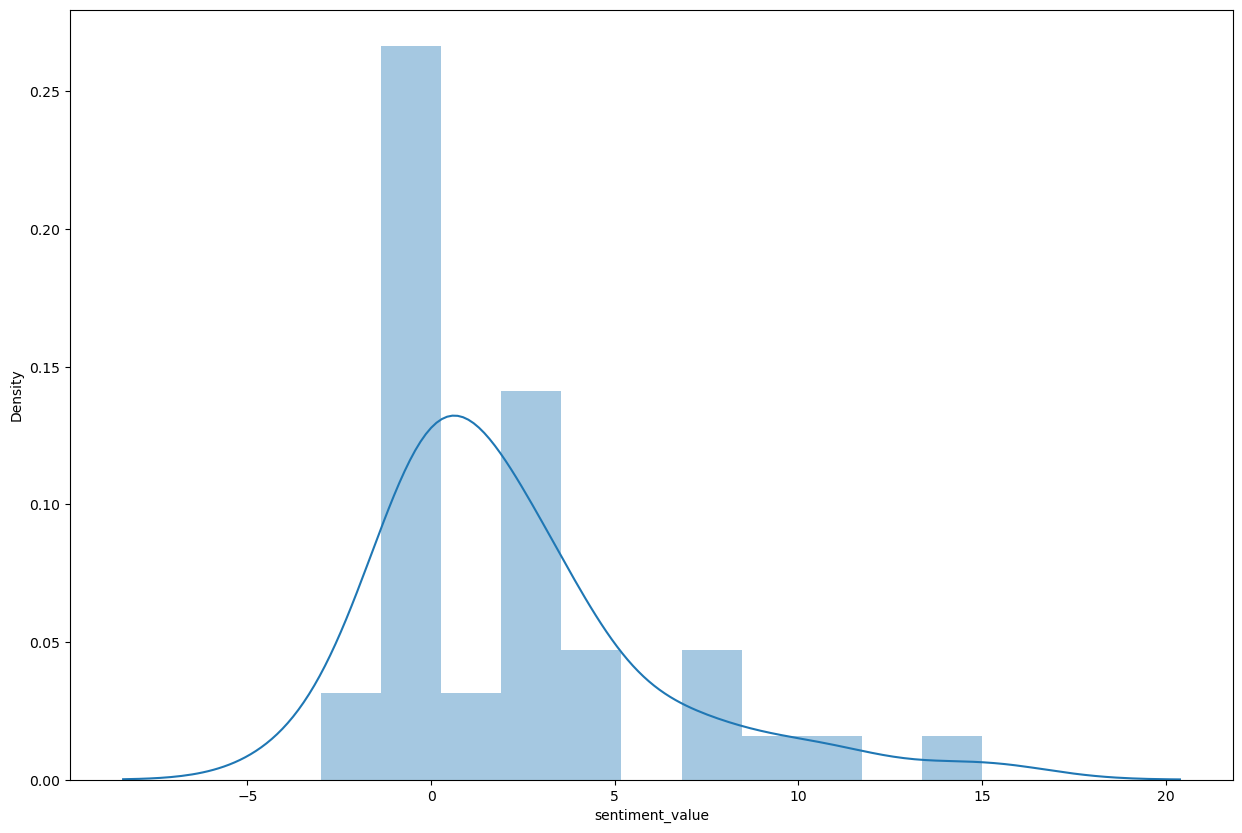

In [81]:
# Plotting the sentiment value for whole review

import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df["sentiment_value"])

<Axes: xlabel='index', ylabel='sentiment_value'>

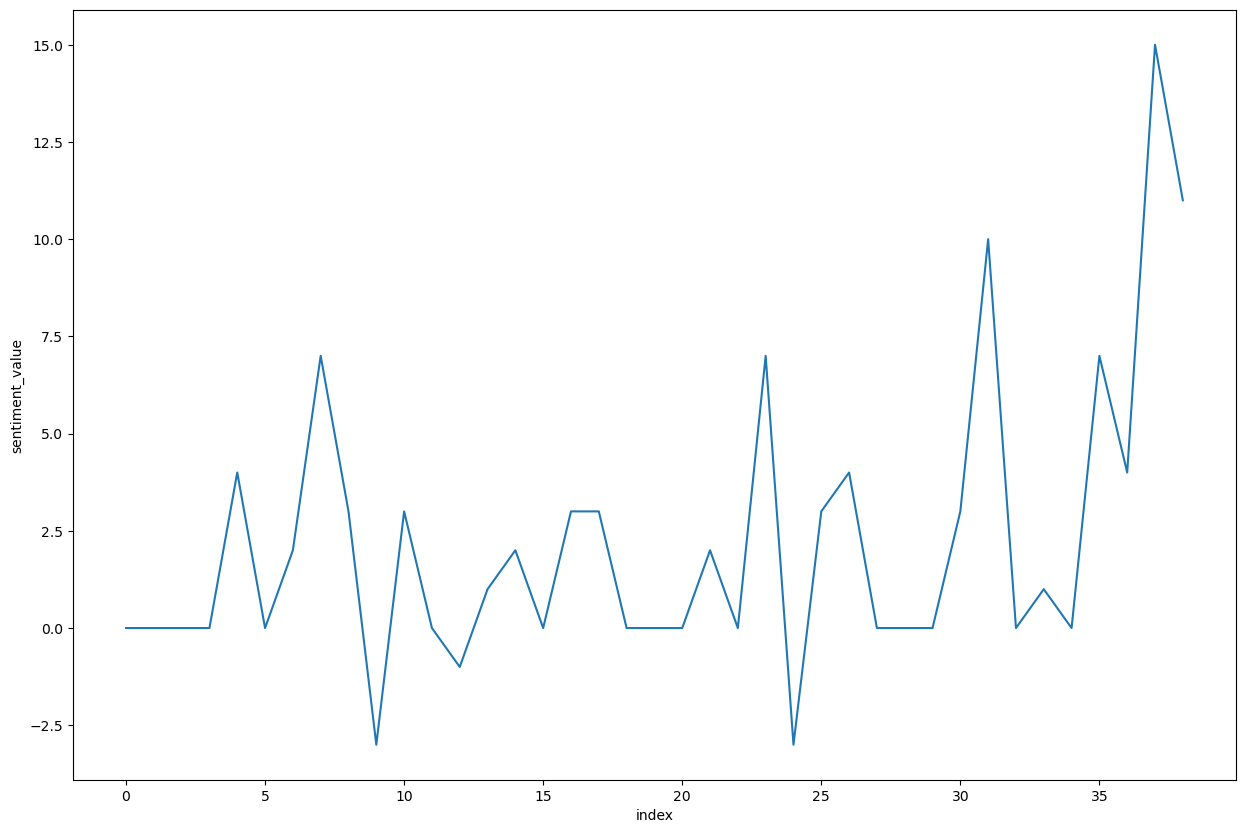

In [82]:
# Plotting the line plot for sentiment value of whole review

plt.figure(figsize=(15,10))
sns.lineplot(y="sentiment_value",x="index",data=sent_df)
